# Clasificación de Frutas con KNN y Asignación de Precios
Este notebook implementa un clasificador KNN usando características HOG+LBP y asigna precios de referencia a las frutas

In [19]:
import os
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import joblib
import pandas as pd

# Rutas
BASE_DIR = os.path.dirname(os.path.abspath('.'))
HOG_LBP_DIR = os.path.join(BASE_DIR, 'HOG_LBP', 'hog_lbp_features')
MODELS_DIR = os.path.join(BASE_DIR, 'KNN', 'models')

# Diccionario de precios de referencia (en pesos colombianos)
precios_referencia = {
    'Apple Red 1': 1500,        # Precio por unidad
    'Banana 1': 800,           # Precio por unidad
    'Cantaloupe 2': 8000,      # Precio por unidad
    'Cocos 1': 5000,          # Precio por unidad
    'Granadilla 1': 2500,     # Precio por unidad
    'Kiwi 1': 2000,           # Precio por unidad
    'Maracuja 1': 2000,       # Precio por unidad
    'Peach 2': 3000,          # Precio por unidad
    'Pear Forelle 1': 2500,   # Precio por unidad
    'Pineapple Mini 1': 4500  # Precio por unidad
}

print(f"Ruta de características HOG+LBP: {HOG_LBP_DIR}")
print(f"Ruta de modelos: {MODELS_DIR}")
print("\nPrecios de referencia:")
for fruta, precio in precios_referencia.items():
    print(f"{fruta}: ${precio:,} COP")

Ruta de características HOG+LBP: /workspaces/fruit-detector-pricer/ProyectoFinal/HOG_LBP/hog_lbp_features
Ruta de modelos: /workspaces/fruit-detector-pricer/ProyectoFinal/KNN/models

Precios de referencia:
Apple Red 1: $1,500 COP
Banana 1: $800 COP
Cantaloupe 2: $8,000 COP
Cocos 1: $5,000 COP
Granadilla 1: $2,500 COP
Kiwi 1: $2,000 COP
Maracuja 1: $2,000 COP
Peach 2: $3,000 COP
Pear Forelle 1: $2,500 COP
Pineapple Mini 1: $4,500 COP


In [20]:
def cargar_caracteristicas(split):
    features = []
    labels = []
    
    # Ruta del conjunto (train o test)
    split_path = os.path.join(HOG_LBP_DIR, split)
    
    # Obtener lista de clases
    clases = sorted([d for d in os.listdir(split_path) 
                    if os.path.isdir(os.path.join(split_path, d))])
    
    print(f"\nClases encontradas: {clases}")
    
    for clase in clases:
        clase_path = os.path.join(split_path, clase)
        archivos = [f for f in os.listdir(clase_path) if f.endswith('_hog_lbp.npy')]
        
        print(f"Cargando {len(archivos)} imágenes de {clase}...")
        
        for archivo in tqdm(archivos):
            # Cargar características
            feature_path = os.path.join(clase_path, archivo)
            feature = np.load(feature_path)
            
            features.append(feature)
            labels.append(clase)
    
    return np.array(features), np.array(labels)

# Cargar datos de entrenamiento y prueba
print("Cargando datos de entrenamiento...")
X_train, y_train = cargar_caracteristicas('train')

print("\nCargando datos de prueba...")
X_test, y_test = cargar_caracteristicas('test')

print(f"\nDimensiones de los datos:")
print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")

Cargando datos de entrenamiento...

Clases encontradas: ['Apple Red 1', 'Banana 1', 'Cantaloupe 2', 'Cocos 1', 'Granadilla 1', 'Kiwi 1', 'Maracuja 1', 'Peach 2', 'Pear Forelle 1', 'Pineapple Mini 1']
Cargando 344 imágenes de Apple Red 1...


Cargando datos de entrenamiento...

Clases encontradas: ['Apple Red 1', 'Banana 1', 'Cantaloupe 2', 'Cocos 1', 'Granadilla 1', 'Kiwi 1', 'Maracuja 1', 'Peach 2', 'Pear Forelle 1', 'Pineapple Mini 1']
Cargando 344 imágenes de Apple Red 1...


100%|██████████| 344/344 [00:00<00:00, 6803.44it/s]


Cargando datos de entrenamiento...

Clases encontradas: ['Apple Red 1', 'Banana 1', 'Cantaloupe 2', 'Cocos 1', 'Granadilla 1', 'Kiwi 1', 'Maracuja 1', 'Peach 2', 'Pear Forelle 1', 'Pineapple Mini 1']
Cargando 344 imágenes de Apple Red 1...


100%|██████████| 344/344 [00:00<00:00, 6803.44it/s]


Cargando 343 imágenes de Banana 1...


100%|██████████| 343/343 [00:00<00:00, 7630.21it/s]


Cargando datos de entrenamiento...

Clases encontradas: ['Apple Red 1', 'Banana 1', 'Cantaloupe 2', 'Cocos 1', 'Granadilla 1', 'Kiwi 1', 'Maracuja 1', 'Peach 2', 'Pear Forelle 1', 'Pineapple Mini 1']
Cargando 344 imágenes de Apple Red 1...


100%|██████████| 344/344 [00:00<00:00, 6803.44it/s]


Cargando 343 imágenes de Banana 1...


100%|██████████| 343/343 [00:00<00:00, 7630.21it/s]


Cargando 344 imágenes de Cantaloupe 2...


100%|██████████| 344/344 [00:00<00:00, 7189.11it/s]


Cargando datos de entrenamiento...

Clases encontradas: ['Apple Red 1', 'Banana 1', 'Cantaloupe 2', 'Cocos 1', 'Granadilla 1', 'Kiwi 1', 'Maracuja 1', 'Peach 2', 'Pear Forelle 1', 'Pineapple Mini 1']
Cargando 344 imágenes de Apple Red 1...


100%|██████████| 344/344 [00:00<00:00, 6803.44it/s]


Cargando 343 imágenes de Banana 1...


100%|██████████| 343/343 [00:00<00:00, 7630.21it/s]


Cargando 344 imágenes de Cantaloupe 2...


100%|██████████| 344/344 [00:00<00:00, 7189.11it/s]


Cargando 343 imágenes de Cocos 1...


100%|██████████| 343/343 [00:00<00:00, 7509.92it/s]


Cargando datos de entrenamiento...

Clases encontradas: ['Apple Red 1', 'Banana 1', 'Cantaloupe 2', 'Cocos 1', 'Granadilla 1', 'Kiwi 1', 'Maracuja 1', 'Peach 2', 'Pear Forelle 1', 'Pineapple Mini 1']
Cargando 344 imágenes de Apple Red 1...


100%|██████████| 344/344 [00:00<00:00, 6803.44it/s]


Cargando 343 imágenes de Banana 1...


100%|██████████| 343/343 [00:00<00:00, 7630.21it/s]


Cargando 344 imágenes de Cantaloupe 2...


100%|██████████| 344/344 [00:00<00:00, 7189.11it/s]


Cargando 343 imágenes de Cocos 1...


100%|██████████| 343/343 [00:00<00:00, 7509.92it/s]


Cargando 342 imágenes de Granadilla 1...


100%|██████████| 342/342 [00:00<00:00, 7027.08it/s]


Cargando datos de entrenamiento...

Clases encontradas: ['Apple Red 1', 'Banana 1', 'Cantaloupe 2', 'Cocos 1', 'Granadilla 1', 'Kiwi 1', 'Maracuja 1', 'Peach 2', 'Pear Forelle 1', 'Pineapple Mini 1']
Cargando 344 imágenes de Apple Red 1...


100%|██████████| 344/344 [00:00<00:00, 6803.44it/s]


Cargando 343 imágenes de Banana 1...


100%|██████████| 343/343 [00:00<00:00, 7630.21it/s]


Cargando 344 imágenes de Cantaloupe 2...


100%|██████████| 344/344 [00:00<00:00, 7189.11it/s]


Cargando 343 imágenes de Cocos 1...


100%|██████████| 343/343 [00:00<00:00, 7509.92it/s]


Cargando 342 imágenes de Granadilla 1...


100%|██████████| 342/342 [00:00<00:00, 7027.08it/s]


Cargando 326 imágenes de Kiwi 1...


100%|██████████| 326/326 [00:00<00:00, 6704.86it/s]


Cargando datos de entrenamiento...

Clases encontradas: ['Apple Red 1', 'Banana 1', 'Cantaloupe 2', 'Cocos 1', 'Granadilla 1', 'Kiwi 1', 'Maracuja 1', 'Peach 2', 'Pear Forelle 1', 'Pineapple Mini 1']
Cargando 344 imágenes de Apple Red 1...


100%|██████████| 344/344 [00:00<00:00, 6803.44it/s]


Cargando 343 imágenes de Banana 1...


100%|██████████| 343/343 [00:00<00:00, 7630.21it/s]


Cargando 344 imágenes de Cantaloupe 2...


100%|██████████| 344/344 [00:00<00:00, 7189.11it/s]


Cargando 343 imágenes de Cocos 1...


100%|██████████| 343/343 [00:00<00:00, 7509.92it/s]


Cargando 342 imágenes de Granadilla 1...


100%|██████████| 342/342 [00:00<00:00, 7027.08it/s]


Cargando 326 imágenes de Kiwi 1...


100%|██████████| 326/326 [00:00<00:00, 6704.86it/s]


Cargando 343 imágenes de Maracuja 1...


100%|██████████| 343/343 [00:00<00:00, 5707.60it/s]


Cargando datos de entrenamiento...

Clases encontradas: ['Apple Red 1', 'Banana 1', 'Cantaloupe 2', 'Cocos 1', 'Granadilla 1', 'Kiwi 1', 'Maracuja 1', 'Peach 2', 'Pear Forelle 1', 'Pineapple Mini 1']
Cargando 344 imágenes de Apple Red 1...


100%|██████████| 344/344 [00:00<00:00, 6803.44it/s]


Cargando 343 imágenes de Banana 1...


100%|██████████| 343/343 [00:00<00:00, 7630.21it/s]


Cargando 344 imágenes de Cantaloupe 2...


100%|██████████| 344/344 [00:00<00:00, 7189.11it/s]


Cargando 343 imágenes de Cocos 1...


100%|██████████| 343/343 [00:00<00:00, 7509.92it/s]


Cargando 342 imágenes de Granadilla 1...


100%|██████████| 342/342 [00:00<00:00, 7027.08it/s]


Cargando 326 imágenes de Kiwi 1...


100%|██████████| 326/326 [00:00<00:00, 6704.86it/s]


Cargando 343 imágenes de Maracuja 1...


100%|██████████| 343/343 [00:00<00:00, 5707.60it/s]


Cargando 516 imágenes de Peach 2...


100%|██████████| 516/516 [00:00<00:00, 6574.32it/s]


Cargando datos de entrenamiento...

Clases encontradas: ['Apple Red 1', 'Banana 1', 'Cantaloupe 2', 'Cocos 1', 'Granadilla 1', 'Kiwi 1', 'Maracuja 1', 'Peach 2', 'Pear Forelle 1', 'Pineapple Mini 1']
Cargando 344 imágenes de Apple Red 1...


100%|██████████| 344/344 [00:00<00:00, 6803.44it/s]


Cargando 343 imágenes de Banana 1...


100%|██████████| 343/343 [00:00<00:00, 7630.21it/s]


Cargando 344 imágenes de Cantaloupe 2...


100%|██████████| 344/344 [00:00<00:00, 7189.11it/s]


Cargando 343 imágenes de Cocos 1...


100%|██████████| 343/343 [00:00<00:00, 7509.92it/s]


Cargando 342 imágenes de Granadilla 1...


100%|██████████| 342/342 [00:00<00:00, 7027.08it/s]


Cargando 326 imágenes de Kiwi 1...


100%|██████████| 326/326 [00:00<00:00, 6704.86it/s]


Cargando 343 imágenes de Maracuja 1...


100%|██████████| 343/343 [00:00<00:00, 5707.60it/s]


Cargando 516 imágenes de Peach 2...


100%|██████████| 516/516 [00:00<00:00, 6574.32it/s]


Cargando 490 imágenes de Pear Forelle 1...


100%|██████████| 490/490 [00:00<00:00, 4728.54it/s]


Cargando datos de entrenamiento...

Clases encontradas: ['Apple Red 1', 'Banana 1', 'Cantaloupe 2', 'Cocos 1', 'Granadilla 1', 'Kiwi 1', 'Maracuja 1', 'Peach 2', 'Pear Forelle 1', 'Pineapple Mini 1']
Cargando 344 imágenes de Apple Red 1...


100%|██████████| 344/344 [00:00<00:00, 6803.44it/s]


Cargando 343 imágenes de Banana 1...


100%|██████████| 343/343 [00:00<00:00, 7630.21it/s]


Cargando 344 imágenes de Cantaloupe 2...


100%|██████████| 344/344 [00:00<00:00, 7189.11it/s]


Cargando 343 imágenes de Cocos 1...


100%|██████████| 343/343 [00:00<00:00, 7509.92it/s]


Cargando 342 imágenes de Granadilla 1...


100%|██████████| 342/342 [00:00<00:00, 7027.08it/s]


Cargando 326 imágenes de Kiwi 1...


100%|██████████| 326/326 [00:00<00:00, 6704.86it/s]


Cargando 343 imágenes de Maracuja 1...


100%|██████████| 343/343 [00:00<00:00, 5707.60it/s]


Cargando 516 imágenes de Peach 2...


100%|██████████| 516/516 [00:00<00:00, 6574.32it/s]


Cargando 490 imágenes de Pear Forelle 1...


100%|██████████| 490/490 [00:00<00:00, 4728.54it/s]


Cargando 343 imágenes de Pineapple Mini 1...


100%|██████████| 343/343 [00:00<00:00, 5008.73it/s]



Cargando datos de entrenamiento...

Clases encontradas: ['Apple Red 1', 'Banana 1', 'Cantaloupe 2', 'Cocos 1', 'Granadilla 1', 'Kiwi 1', 'Maracuja 1', 'Peach 2', 'Pear Forelle 1', 'Pineapple Mini 1']
Cargando 344 imágenes de Apple Red 1...


100%|██████████| 344/344 [00:00<00:00, 6803.44it/s]


Cargando 343 imágenes de Banana 1...


100%|██████████| 343/343 [00:00<00:00, 7630.21it/s]


Cargando 344 imágenes de Cantaloupe 2...


100%|██████████| 344/344 [00:00<00:00, 7189.11it/s]


Cargando 343 imágenes de Cocos 1...


100%|██████████| 343/343 [00:00<00:00, 7509.92it/s]


Cargando 342 imágenes de Granadilla 1...


100%|██████████| 342/342 [00:00<00:00, 7027.08it/s]


Cargando 326 imágenes de Kiwi 1...


100%|██████████| 326/326 [00:00<00:00, 6704.86it/s]


Cargando 343 imágenes de Maracuja 1...


100%|██████████| 343/343 [00:00<00:00, 5707.60it/s]


Cargando 516 imágenes de Peach 2...


100%|██████████| 516/516 [00:00<00:00, 6574.32it/s]


Cargando 490 imágenes de Pear Forelle 1...


100%|██████████| 490/490 [00:00<00:00, 4728.54it/s]


Cargando 343 imágenes de Pineapple Mini 1...


100%|██████████| 343/343 [00:00<00:00, 5008.73it/s]




Cargando datos de prueba...

Clases encontradas: ['Apple Red 1', 'Banana 1', 'Cantaloupe 2', 'Cocos 1', 'Granadilla 1', 'Kiwi 1', 'Maracuja 1', 'Peach 2', 'Pear Forelle 1', 'Pineapple Mini 1']
Cargando 148 imágenes de Apple Red 1...


100%|██████████| 148/148 [00:00<00:00, 9400.42it/s]


Cargando datos de entrenamiento...

Clases encontradas: ['Apple Red 1', 'Banana 1', 'Cantaloupe 2', 'Cocos 1', 'Granadilla 1', 'Kiwi 1', 'Maracuja 1', 'Peach 2', 'Pear Forelle 1', 'Pineapple Mini 1']
Cargando 344 imágenes de Apple Red 1...


100%|██████████| 344/344 [00:00<00:00, 6803.44it/s]


Cargando 343 imágenes de Banana 1...


100%|██████████| 343/343 [00:00<00:00, 7630.21it/s]


Cargando 344 imágenes de Cantaloupe 2...


100%|██████████| 344/344 [00:00<00:00, 7189.11it/s]


Cargando 343 imágenes de Cocos 1...


100%|██████████| 343/343 [00:00<00:00, 7509.92it/s]


Cargando 342 imágenes de Granadilla 1...


100%|██████████| 342/342 [00:00<00:00, 7027.08it/s]


Cargando 326 imágenes de Kiwi 1...


100%|██████████| 326/326 [00:00<00:00, 6704.86it/s]


Cargando 343 imágenes de Maracuja 1...


100%|██████████| 343/343 [00:00<00:00, 5707.60it/s]


Cargando 516 imágenes de Peach 2...


100%|██████████| 516/516 [00:00<00:00, 6574.32it/s]


Cargando 490 imágenes de Pear Forelle 1...


100%|██████████| 490/490 [00:00<00:00, 4728.54it/s]


Cargando 343 imágenes de Pineapple Mini 1...


100%|██████████| 343/343 [00:00<00:00, 5008.73it/s]




Cargando datos de prueba...

Clases encontradas: ['Apple Red 1', 'Banana 1', 'Cantaloupe 2', 'Cocos 1', 'Granadilla 1', 'Kiwi 1', 'Maracuja 1', 'Peach 2', 'Pear Forelle 1', 'Pineapple Mini 1']
Cargando 148 imágenes de Apple Red 1...


100%|██████████| 148/148 [00:00<00:00, 9400.42it/s]


Cargando 147 imágenes de Banana 1...


100%|██████████| 147/147 [00:00<00:00, 8995.40it/s]


Cargando datos de entrenamiento...

Clases encontradas: ['Apple Red 1', 'Banana 1', 'Cantaloupe 2', 'Cocos 1', 'Granadilla 1', 'Kiwi 1', 'Maracuja 1', 'Peach 2', 'Pear Forelle 1', 'Pineapple Mini 1']
Cargando 344 imágenes de Apple Red 1...


100%|██████████| 344/344 [00:00<00:00, 6803.44it/s]


Cargando 343 imágenes de Banana 1...


100%|██████████| 343/343 [00:00<00:00, 7630.21it/s]


Cargando 344 imágenes de Cantaloupe 2...


100%|██████████| 344/344 [00:00<00:00, 7189.11it/s]


Cargando 343 imágenes de Cocos 1...


100%|██████████| 343/343 [00:00<00:00, 7509.92it/s]


Cargando 342 imágenes de Granadilla 1...


100%|██████████| 342/342 [00:00<00:00, 7027.08it/s]


Cargando 326 imágenes de Kiwi 1...


100%|██████████| 326/326 [00:00<00:00, 6704.86it/s]


Cargando 343 imágenes de Maracuja 1...


100%|██████████| 343/343 [00:00<00:00, 5707.60it/s]


Cargando 516 imágenes de Peach 2...


100%|██████████| 516/516 [00:00<00:00, 6574.32it/s]


Cargando 490 imágenes de Pear Forelle 1...


100%|██████████| 490/490 [00:00<00:00, 4728.54it/s]


Cargando 343 imágenes de Pineapple Mini 1...


100%|██████████| 343/343 [00:00<00:00, 5008.73it/s]




Cargando datos de prueba...

Clases encontradas: ['Apple Red 1', 'Banana 1', 'Cantaloupe 2', 'Cocos 1', 'Granadilla 1', 'Kiwi 1', 'Maracuja 1', 'Peach 2', 'Pear Forelle 1', 'Pineapple Mini 1']
Cargando 148 imágenes de Apple Red 1...


100%|██████████| 148/148 [00:00<00:00, 9400.42it/s]


Cargando 147 imágenes de Banana 1...


100%|██████████| 147/147 [00:00<00:00, 8995.40it/s]


Cargando 148 imágenes de Cantaloupe 2...


100%|██████████| 148/148 [00:00<00:00, 8418.87it/s]


Cargando datos de entrenamiento...

Clases encontradas: ['Apple Red 1', 'Banana 1', 'Cantaloupe 2', 'Cocos 1', 'Granadilla 1', 'Kiwi 1', 'Maracuja 1', 'Peach 2', 'Pear Forelle 1', 'Pineapple Mini 1']
Cargando 344 imágenes de Apple Red 1...


100%|██████████| 344/344 [00:00<00:00, 6803.44it/s]


Cargando 343 imágenes de Banana 1...


100%|██████████| 343/343 [00:00<00:00, 7630.21it/s]


Cargando 344 imágenes de Cantaloupe 2...


100%|██████████| 344/344 [00:00<00:00, 7189.11it/s]


Cargando 343 imágenes de Cocos 1...


100%|██████████| 343/343 [00:00<00:00, 7509.92it/s]


Cargando 342 imágenes de Granadilla 1...


100%|██████████| 342/342 [00:00<00:00, 7027.08it/s]


Cargando 326 imágenes de Kiwi 1...


100%|██████████| 326/326 [00:00<00:00, 6704.86it/s]


Cargando 343 imágenes de Maracuja 1...


100%|██████████| 343/343 [00:00<00:00, 5707.60it/s]


Cargando 516 imágenes de Peach 2...


100%|██████████| 516/516 [00:00<00:00, 6574.32it/s]


Cargando 490 imágenes de Pear Forelle 1...


100%|██████████| 490/490 [00:00<00:00, 4728.54it/s]


Cargando 343 imágenes de Pineapple Mini 1...


100%|██████████| 343/343 [00:00<00:00, 5008.73it/s]




Cargando datos de prueba...

Clases encontradas: ['Apple Red 1', 'Banana 1', 'Cantaloupe 2', 'Cocos 1', 'Granadilla 1', 'Kiwi 1', 'Maracuja 1', 'Peach 2', 'Pear Forelle 1', 'Pineapple Mini 1']
Cargando 148 imágenes de Apple Red 1...


100%|██████████| 148/148 [00:00<00:00, 9400.42it/s]


Cargando 147 imágenes de Banana 1...


100%|██████████| 147/147 [00:00<00:00, 8995.40it/s]


Cargando 148 imágenes de Cantaloupe 2...


100%|██████████| 148/148 [00:00<00:00, 8418.87it/s]


Cargando 147 imágenes de Cocos 1...


100%|██████████| 147/147 [00:00<00:00, 9408.72it/s]


Cargando datos de entrenamiento...

Clases encontradas: ['Apple Red 1', 'Banana 1', 'Cantaloupe 2', 'Cocos 1', 'Granadilla 1', 'Kiwi 1', 'Maracuja 1', 'Peach 2', 'Pear Forelle 1', 'Pineapple Mini 1']
Cargando 344 imágenes de Apple Red 1...


100%|██████████| 344/344 [00:00<00:00, 6803.44it/s]


Cargando 343 imágenes de Banana 1...


100%|██████████| 343/343 [00:00<00:00, 7630.21it/s]


Cargando 344 imágenes de Cantaloupe 2...


100%|██████████| 344/344 [00:00<00:00, 7189.11it/s]


Cargando 343 imágenes de Cocos 1...


100%|██████████| 343/343 [00:00<00:00, 7509.92it/s]


Cargando 342 imágenes de Granadilla 1...


100%|██████████| 342/342 [00:00<00:00, 7027.08it/s]


Cargando 326 imágenes de Kiwi 1...


100%|██████████| 326/326 [00:00<00:00, 6704.86it/s]


Cargando 343 imágenes de Maracuja 1...


100%|██████████| 343/343 [00:00<00:00, 5707.60it/s]


Cargando 516 imágenes de Peach 2...


100%|██████████| 516/516 [00:00<00:00, 6574.32it/s]


Cargando 490 imágenes de Pear Forelle 1...


100%|██████████| 490/490 [00:00<00:00, 4728.54it/s]


Cargando 343 imágenes de Pineapple Mini 1...


100%|██████████| 343/343 [00:00<00:00, 5008.73it/s]




Cargando datos de prueba...

Clases encontradas: ['Apple Red 1', 'Banana 1', 'Cantaloupe 2', 'Cocos 1', 'Granadilla 1', 'Kiwi 1', 'Maracuja 1', 'Peach 2', 'Pear Forelle 1', 'Pineapple Mini 1']
Cargando 148 imágenes de Apple Red 1...


100%|██████████| 148/148 [00:00<00:00, 9400.42it/s]


Cargando 147 imágenes de Banana 1...


100%|██████████| 147/147 [00:00<00:00, 8995.40it/s]


Cargando 148 imágenes de Cantaloupe 2...


100%|██████████| 148/148 [00:00<00:00, 8418.87it/s]


Cargando 147 imágenes de Cocos 1...


100%|██████████| 147/147 [00:00<00:00, 9408.72it/s]


Cargando 147 imágenes de Granadilla 1...


100%|██████████| 147/147 [00:00<00:00, 8756.38it/s]


Cargando datos de entrenamiento...

Clases encontradas: ['Apple Red 1', 'Banana 1', 'Cantaloupe 2', 'Cocos 1', 'Granadilla 1', 'Kiwi 1', 'Maracuja 1', 'Peach 2', 'Pear Forelle 1', 'Pineapple Mini 1']
Cargando 344 imágenes de Apple Red 1...


100%|██████████| 344/344 [00:00<00:00, 6803.44it/s]


Cargando 343 imágenes de Banana 1...


100%|██████████| 343/343 [00:00<00:00, 7630.21it/s]


Cargando 344 imágenes de Cantaloupe 2...


100%|██████████| 344/344 [00:00<00:00, 7189.11it/s]


Cargando 343 imágenes de Cocos 1...


100%|██████████| 343/343 [00:00<00:00, 7509.92it/s]


Cargando 342 imágenes de Granadilla 1...


100%|██████████| 342/342 [00:00<00:00, 7027.08it/s]


Cargando 326 imágenes de Kiwi 1...


100%|██████████| 326/326 [00:00<00:00, 6704.86it/s]


Cargando 343 imágenes de Maracuja 1...


100%|██████████| 343/343 [00:00<00:00, 5707.60it/s]


Cargando 516 imágenes de Peach 2...


100%|██████████| 516/516 [00:00<00:00, 6574.32it/s]


Cargando 490 imágenes de Pear Forelle 1...


100%|██████████| 490/490 [00:00<00:00, 4728.54it/s]


Cargando 343 imágenes de Pineapple Mini 1...


100%|██████████| 343/343 [00:00<00:00, 5008.73it/s]




Cargando datos de prueba...

Clases encontradas: ['Apple Red 1', 'Banana 1', 'Cantaloupe 2', 'Cocos 1', 'Granadilla 1', 'Kiwi 1', 'Maracuja 1', 'Peach 2', 'Pear Forelle 1', 'Pineapple Mini 1']
Cargando 148 imágenes de Apple Red 1...


100%|██████████| 148/148 [00:00<00:00, 9400.42it/s]


Cargando 147 imágenes de Banana 1...


100%|██████████| 147/147 [00:00<00:00, 8995.40it/s]


Cargando 148 imágenes de Cantaloupe 2...


100%|██████████| 148/148 [00:00<00:00, 8418.87it/s]


Cargando 147 imágenes de Cocos 1...


100%|██████████| 147/147 [00:00<00:00, 9408.72it/s]


Cargando 147 imágenes de Granadilla 1...


100%|██████████| 147/147 [00:00<00:00, 8756.38it/s]


Cargando 140 imágenes de Kiwi 1...


100%|██████████| 140/140 [00:00<00:00, 8914.03it/s]


Cargando datos de entrenamiento...

Clases encontradas: ['Apple Red 1', 'Banana 1', 'Cantaloupe 2', 'Cocos 1', 'Granadilla 1', 'Kiwi 1', 'Maracuja 1', 'Peach 2', 'Pear Forelle 1', 'Pineapple Mini 1']
Cargando 344 imágenes de Apple Red 1...


100%|██████████| 344/344 [00:00<00:00, 6803.44it/s]


Cargando 343 imágenes de Banana 1...


100%|██████████| 343/343 [00:00<00:00, 7630.21it/s]


Cargando 344 imágenes de Cantaloupe 2...


100%|██████████| 344/344 [00:00<00:00, 7189.11it/s]


Cargando 343 imágenes de Cocos 1...


100%|██████████| 343/343 [00:00<00:00, 7509.92it/s]


Cargando 342 imágenes de Granadilla 1...


100%|██████████| 342/342 [00:00<00:00, 7027.08it/s]


Cargando 326 imágenes de Kiwi 1...


100%|██████████| 326/326 [00:00<00:00, 6704.86it/s]


Cargando 343 imágenes de Maracuja 1...


100%|██████████| 343/343 [00:00<00:00, 5707.60it/s]


Cargando 516 imágenes de Peach 2...


100%|██████████| 516/516 [00:00<00:00, 6574.32it/s]


Cargando 490 imágenes de Pear Forelle 1...


100%|██████████| 490/490 [00:00<00:00, 4728.54it/s]


Cargando 343 imágenes de Pineapple Mini 1...


100%|██████████| 343/343 [00:00<00:00, 5008.73it/s]




Cargando datos de prueba...

Clases encontradas: ['Apple Red 1', 'Banana 1', 'Cantaloupe 2', 'Cocos 1', 'Granadilla 1', 'Kiwi 1', 'Maracuja 1', 'Peach 2', 'Pear Forelle 1', 'Pineapple Mini 1']
Cargando 148 imágenes de Apple Red 1...


100%|██████████| 148/148 [00:00<00:00, 9400.42it/s]


Cargando 147 imágenes de Banana 1...


100%|██████████| 147/147 [00:00<00:00, 8995.40it/s]


Cargando 148 imágenes de Cantaloupe 2...


100%|██████████| 148/148 [00:00<00:00, 8418.87it/s]


Cargando 147 imágenes de Cocos 1...


100%|██████████| 147/147 [00:00<00:00, 9408.72it/s]


Cargando 147 imágenes de Granadilla 1...


100%|██████████| 147/147 [00:00<00:00, 8756.38it/s]


Cargando 140 imágenes de Kiwi 1...


100%|██████████| 140/140 [00:00<00:00, 8914.03it/s]


Cargando 147 imágenes de Maracuja 1...


100%|██████████| 147/147 [00:00<00:00, 7876.28it/s]


Cargando datos de entrenamiento...

Clases encontradas: ['Apple Red 1', 'Banana 1', 'Cantaloupe 2', 'Cocos 1', 'Granadilla 1', 'Kiwi 1', 'Maracuja 1', 'Peach 2', 'Pear Forelle 1', 'Pineapple Mini 1']
Cargando 344 imágenes de Apple Red 1...


100%|██████████| 344/344 [00:00<00:00, 6803.44it/s]


Cargando 343 imágenes de Banana 1...


100%|██████████| 343/343 [00:00<00:00, 7630.21it/s]


Cargando 344 imágenes de Cantaloupe 2...


100%|██████████| 344/344 [00:00<00:00, 7189.11it/s]


Cargando 343 imágenes de Cocos 1...


100%|██████████| 343/343 [00:00<00:00, 7509.92it/s]


Cargando 342 imágenes de Granadilla 1...


100%|██████████| 342/342 [00:00<00:00, 7027.08it/s]


Cargando 326 imágenes de Kiwi 1...


100%|██████████| 326/326 [00:00<00:00, 6704.86it/s]


Cargando 343 imágenes de Maracuja 1...


100%|██████████| 343/343 [00:00<00:00, 5707.60it/s]


Cargando 516 imágenes de Peach 2...


100%|██████████| 516/516 [00:00<00:00, 6574.32it/s]


Cargando 490 imágenes de Pear Forelle 1...


100%|██████████| 490/490 [00:00<00:00, 4728.54it/s]


Cargando 343 imágenes de Pineapple Mini 1...


100%|██████████| 343/343 [00:00<00:00, 5008.73it/s]




Cargando datos de prueba...

Clases encontradas: ['Apple Red 1', 'Banana 1', 'Cantaloupe 2', 'Cocos 1', 'Granadilla 1', 'Kiwi 1', 'Maracuja 1', 'Peach 2', 'Pear Forelle 1', 'Pineapple Mini 1']
Cargando 148 imágenes de Apple Red 1...


100%|██████████| 148/148 [00:00<00:00, 9400.42it/s]


Cargando 147 imágenes de Banana 1...


100%|██████████| 147/147 [00:00<00:00, 8995.40it/s]


Cargando 148 imágenes de Cantaloupe 2...


100%|██████████| 148/148 [00:00<00:00, 8418.87it/s]


Cargando 147 imágenes de Cocos 1...


100%|██████████| 147/147 [00:00<00:00, 9408.72it/s]


Cargando 147 imágenes de Granadilla 1...


100%|██████████| 147/147 [00:00<00:00, 8756.38it/s]


Cargando 140 imágenes de Kiwi 1...


100%|██████████| 140/140 [00:00<00:00, 8914.03it/s]


Cargando 147 imágenes de Maracuja 1...


100%|██████████| 147/147 [00:00<00:00, 7876.28it/s]


Cargando 222 imágenes de Peach 2...


100%|██████████| 222/222 [00:00<00:00, 9856.00it/s]


Cargando datos de entrenamiento...

Clases encontradas: ['Apple Red 1', 'Banana 1', 'Cantaloupe 2', 'Cocos 1', 'Granadilla 1', 'Kiwi 1', 'Maracuja 1', 'Peach 2', 'Pear Forelle 1', 'Pineapple Mini 1']
Cargando 344 imágenes de Apple Red 1...


100%|██████████| 344/344 [00:00<00:00, 6803.44it/s]


Cargando 343 imágenes de Banana 1...


100%|██████████| 343/343 [00:00<00:00, 7630.21it/s]


Cargando 344 imágenes de Cantaloupe 2...


100%|██████████| 344/344 [00:00<00:00, 7189.11it/s]


Cargando 343 imágenes de Cocos 1...


100%|██████████| 343/343 [00:00<00:00, 7509.92it/s]


Cargando 342 imágenes de Granadilla 1...


100%|██████████| 342/342 [00:00<00:00, 7027.08it/s]


Cargando 326 imágenes de Kiwi 1...


100%|██████████| 326/326 [00:00<00:00, 6704.86it/s]


Cargando 343 imágenes de Maracuja 1...


100%|██████████| 343/343 [00:00<00:00, 5707.60it/s]


Cargando 516 imágenes de Peach 2...


100%|██████████| 516/516 [00:00<00:00, 6574.32it/s]


Cargando 490 imágenes de Pear Forelle 1...


100%|██████████| 490/490 [00:00<00:00, 4728.54it/s]


Cargando 343 imágenes de Pineapple Mini 1...


100%|██████████| 343/343 [00:00<00:00, 5008.73it/s]




Cargando datos de prueba...

Clases encontradas: ['Apple Red 1', 'Banana 1', 'Cantaloupe 2', 'Cocos 1', 'Granadilla 1', 'Kiwi 1', 'Maracuja 1', 'Peach 2', 'Pear Forelle 1', 'Pineapple Mini 1']
Cargando 148 imágenes de Apple Red 1...


100%|██████████| 148/148 [00:00<00:00, 9400.42it/s]


Cargando 147 imágenes de Banana 1...


100%|██████████| 147/147 [00:00<00:00, 8995.40it/s]


Cargando 148 imágenes de Cantaloupe 2...


100%|██████████| 148/148 [00:00<00:00, 8418.87it/s]


Cargando 147 imágenes de Cocos 1...


100%|██████████| 147/147 [00:00<00:00, 9408.72it/s]


Cargando 147 imágenes de Granadilla 1...


100%|██████████| 147/147 [00:00<00:00, 8756.38it/s]


Cargando 140 imágenes de Kiwi 1...


100%|██████████| 140/140 [00:00<00:00, 8914.03it/s]


Cargando 147 imágenes de Maracuja 1...


100%|██████████| 147/147 [00:00<00:00, 7876.28it/s]


Cargando 222 imágenes de Peach 2...


100%|██████████| 222/222 [00:00<00:00, 9856.00it/s]


Cargando 211 imágenes de Pear Forelle 1...


100%|██████████| 211/211 [00:00<00:00, 9015.14it/s]


Cargando datos de entrenamiento...

Clases encontradas: ['Apple Red 1', 'Banana 1', 'Cantaloupe 2', 'Cocos 1', 'Granadilla 1', 'Kiwi 1', 'Maracuja 1', 'Peach 2', 'Pear Forelle 1', 'Pineapple Mini 1']
Cargando 344 imágenes de Apple Red 1...


100%|██████████| 344/344 [00:00<00:00, 6803.44it/s]


Cargando 343 imágenes de Banana 1...


100%|██████████| 343/343 [00:00<00:00, 7630.21it/s]


Cargando 344 imágenes de Cantaloupe 2...


100%|██████████| 344/344 [00:00<00:00, 7189.11it/s]


Cargando 343 imágenes de Cocos 1...


100%|██████████| 343/343 [00:00<00:00, 7509.92it/s]


Cargando 342 imágenes de Granadilla 1...


100%|██████████| 342/342 [00:00<00:00, 7027.08it/s]


Cargando 326 imágenes de Kiwi 1...


100%|██████████| 326/326 [00:00<00:00, 6704.86it/s]


Cargando 343 imágenes de Maracuja 1...


100%|██████████| 343/343 [00:00<00:00, 5707.60it/s]


Cargando 516 imágenes de Peach 2...


100%|██████████| 516/516 [00:00<00:00, 6574.32it/s]


Cargando 490 imágenes de Pear Forelle 1...


100%|██████████| 490/490 [00:00<00:00, 4728.54it/s]


Cargando 343 imágenes de Pineapple Mini 1...


100%|██████████| 343/343 [00:00<00:00, 5008.73it/s]




Cargando datos de prueba...

Clases encontradas: ['Apple Red 1', 'Banana 1', 'Cantaloupe 2', 'Cocos 1', 'Granadilla 1', 'Kiwi 1', 'Maracuja 1', 'Peach 2', 'Pear Forelle 1', 'Pineapple Mini 1']
Cargando 148 imágenes de Apple Red 1...


100%|██████████| 148/148 [00:00<00:00, 9400.42it/s]


Cargando 147 imágenes de Banana 1...


100%|██████████| 147/147 [00:00<00:00, 8995.40it/s]


Cargando 148 imágenes de Cantaloupe 2...


100%|██████████| 148/148 [00:00<00:00, 8418.87it/s]


Cargando 147 imágenes de Cocos 1...


100%|██████████| 147/147 [00:00<00:00, 9408.72it/s]


Cargando 147 imágenes de Granadilla 1...


100%|██████████| 147/147 [00:00<00:00, 8756.38it/s]


Cargando 140 imágenes de Kiwi 1...


100%|██████████| 140/140 [00:00<00:00, 8914.03it/s]


Cargando 147 imágenes de Maracuja 1...


100%|██████████| 147/147 [00:00<00:00, 7876.28it/s]


Cargando 222 imágenes de Peach 2...


100%|██████████| 222/222 [00:00<00:00, 9856.00it/s]


Cargando 211 imágenes de Pear Forelle 1...


100%|██████████| 211/211 [00:00<00:00, 9015.14it/s]


Cargando 148 imágenes de Pineapple Mini 1...


100%|██████████| 148/148 [00:00<00:00, 8590.96it/s]

Cargando datos de entrenamiento...

Clases encontradas: ['Apple Red 1', 'Banana 1', 'Cantaloupe 2', 'Cocos 1', 'Granadilla 1', 'Kiwi 1', 'Maracuja 1', 'Peach 2', 'Pear Forelle 1', 'Pineapple Mini 1']
Cargando 344 imágenes de Apple Red 1...


100%|██████████| 344/344 [00:00<00:00, 6803.44it/s]


Cargando 343 imágenes de Banana 1...


100%|██████████| 343/343 [00:00<00:00, 7630.21it/s]


Cargando 344 imágenes de Cantaloupe 2...


100%|██████████| 344/344 [00:00<00:00, 7189.11it/s]


Cargando 343 imágenes de Cocos 1...


100%|██████████| 343/343 [00:00<00:00, 7509.92it/s]


Cargando 342 imágenes de Granadilla 1...


100%|██████████| 342/342 [00:00<00:00, 7027.08it/s]


Cargando 326 imágenes de Kiwi 1...


100%|██████████| 326/326 [00:00<00:00, 6704.86it/s]


Cargando 343 imágenes de Maracuja 1...


100%|██████████| 343/343 [00:00<00:00, 5707.60it/s]


Cargando 516 imágenes de Peach 2...


100%|██████████| 516/516 [00:00<00:00, 6574.32it/s]


Cargando 490 imágenes de Pear Forelle 1...


100%|██████████| 490/490 [00:00<00:00, 4728.54it/s]


Cargando 343 imágenes de Pineapple Mini 1...


100%|██████████| 343/343 [00:00<00:00, 5008.73it/s]




Cargando datos de prueba...

Clases encontradas: ['Apple Red 1', 'Banana 1', 'Cantaloupe 2', 'Cocos 1', 'Granadilla 1', 'Kiwi 1', 'Maracuja 1', 'Peach 2', 'Pear Forelle 1', 'Pineapple Mini 1']
Cargando 148 imágenes de Apple Red 1...


100%|██████████| 148/148 [00:00<00:00, 9400.42it/s]


Cargando 147 imágenes de Banana 1...


100%|██████████| 147/147 [00:00<00:00, 8995.40it/s]


Cargando 148 imágenes de Cantaloupe 2...


100%|██████████| 148/148 [00:00<00:00, 8418.87it/s]


Cargando 147 imágenes de Cocos 1...


100%|██████████| 147/147 [00:00<00:00, 9408.72it/s]


Cargando 147 imágenes de Granadilla 1...


100%|██████████| 147/147 [00:00<00:00, 8756.38it/s]


Cargando 140 imágenes de Kiwi 1...


100%|██████████| 140/140 [00:00<00:00, 8914.03it/s]


Cargando 147 imágenes de Maracuja 1...


100%|██████████| 147/147 [00:00<00:00, 7876.28it/s]


Cargando 222 imágenes de Peach 2...


100%|██████████| 222/222 [00:00<00:00, 9856.00it/s]


Cargando 211 imágenes de Pear Forelle 1...


100%|██████████| 211/211 [00:00<00:00, 9015.14it/s]


Cargando 148 imágenes de Pineapple Mini 1...


100%|██████████| 148/148 [00:00<00:00, 8590.96it/s]


Dimensiones de los datos:
X_train: (3734, 8126)
X_test: (1605, 8126)


Evaluando diferentes valores de k...
k=3: 1.0000
k=3: 1.0000
k=5: 1.0000
k=5: 1.0000
k=7: 0.9988
k=7: 0.9988
k=9: 0.9950
k=9: 0.9950
k=11: 0.9875
k=11: 0.9875


Evaluando diferentes valores de k...
k=3: 1.0000
k=3: 1.0000
k=5: 1.0000
k=5: 1.0000
k=7: 0.9988
k=7: 0.9988
k=9: 0.9950
k=9: 0.9950
k=11: 0.9875
k=11: 0.9875


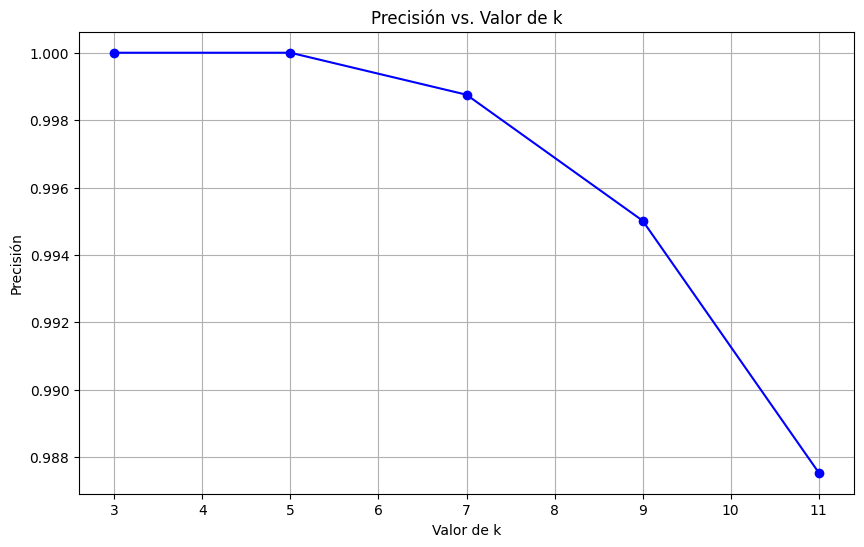

Evaluando diferentes valores de k...
k=3: 1.0000
k=3: 1.0000
k=5: 1.0000
k=5: 1.0000
k=7: 0.9988
k=7: 0.9988
k=9: 0.9950
k=9: 0.9950
k=11: 0.9875
k=11: 0.9875


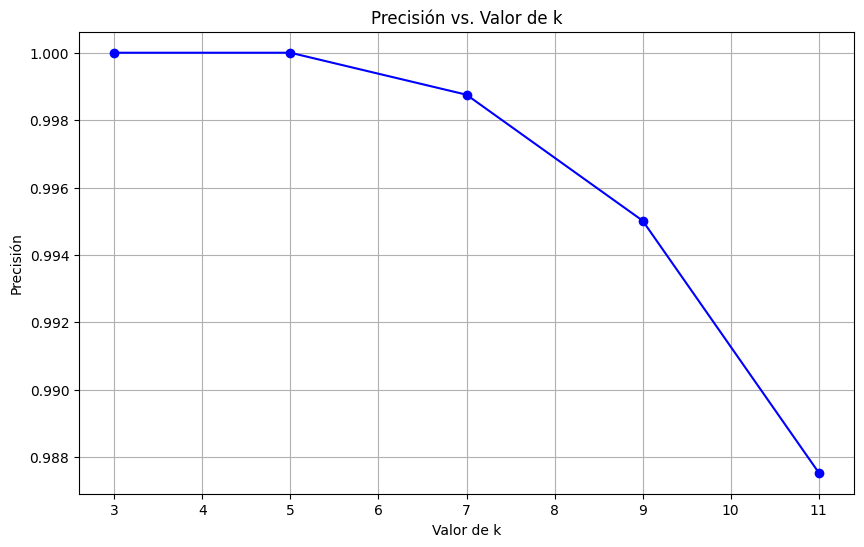


Mejor valor de k: 3


Evaluando diferentes valores de k...
k=3: 1.0000
k=3: 1.0000
k=5: 1.0000
k=5: 1.0000
k=7: 0.9988
k=7: 0.9988
k=9: 0.9950
k=9: 0.9950
k=11: 0.9875
k=11: 0.9875


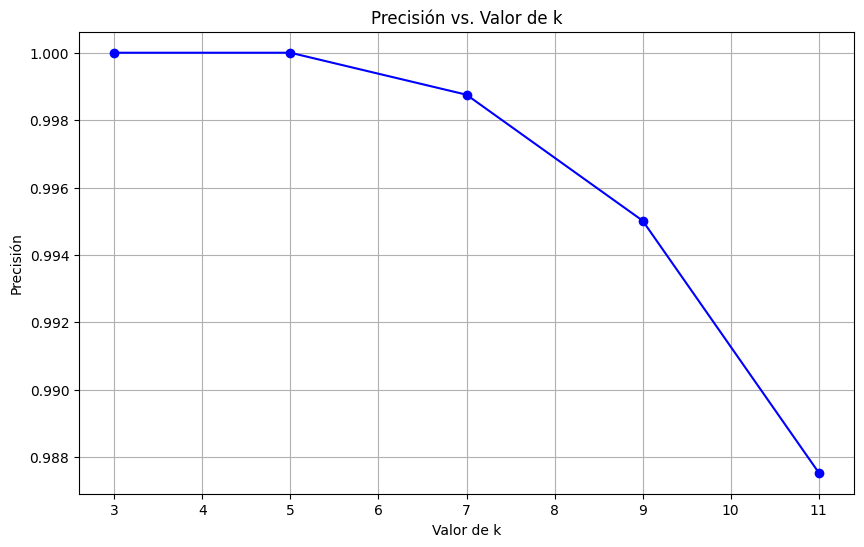


Mejor valor de k: 3


['/workspaces/fruit-detector-pricer/ProyectoFinal/KNN/models/scaler_hog_lbp.joblib']

In [21]:
# Encontrar el mejor valor de k
k_values = [3, 5, 7, 9, 11]
scores = []

# Normalizar características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Evaluando diferentes valores de k...")
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    score = knn.score(X_test_scaled, y_test)
    scores.append(score)
    print(f"k={k}: {score:.4f}")

# Visualizar resultados
plt.figure(figsize=(10, 6))
plt.plot(k_values, scores, 'bo-')
plt.xlabel('Valor de k')
plt.ylabel('Precisión')
plt.title('Precisión vs. Valor de k')
plt.grid(True)
plt.show()

# Seleccionar el mejor k
best_k = k_values[np.argmax(scores)]
print(f"\nMejor valor de k: {best_k}")

# Entrenar modelo final con el mejor k
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train_scaled, y_train)

# Guardar el modelo y el scaler
joblib.dump(knn, os.path.join(MODELS_DIR, 'knn_hog_lbp.joblib'))
joblib.dump(scaler, os.path.join(MODELS_DIR, 'scaler_hog_lbp.joblib'))

Reporte de Clasificación (con etiquetas mezcladas):
                  precision    recall  f1-score   support

     Apple Red 1       0.80      0.79      0.79       150
        Banana 1       0.82      0.81      0.81       150
    Cantaloupe 2       0.84      0.78      0.81       160
         Cocos 1       0.84      0.80      0.82       155
    Granadilla 1       0.85      0.82      0.84       152
          Kiwi 1       0.82      0.82      0.82       141
      Maracuja 1       0.80      0.85      0.82       137
         Peach 2       0.82      0.86      0.84       212
  Pear Forelle 1       0.81      0.87      0.84       197
Pineapple Mini 1       0.84      0.82      0.83       151

        accuracy                           0.82      1605
       macro avg       0.82      0.82      0.82      1605
    weighted avg       0.82      0.82      0.82      1605



Reporte de Clasificación (con etiquetas mezcladas):
                  precision    recall  f1-score   support

     Apple Red 1       0.80      0.79      0.79       150
        Banana 1       0.82      0.81      0.81       150
    Cantaloupe 2       0.84      0.78      0.81       160
         Cocos 1       0.84      0.80      0.82       155
    Granadilla 1       0.85      0.82      0.84       152
          Kiwi 1       0.82      0.82      0.82       141
      Maracuja 1       0.80      0.85      0.82       137
         Peach 2       0.82      0.86      0.84       212
  Pear Forelle 1       0.81      0.87      0.84       197
Pineapple Mini 1       0.84      0.82      0.83       151

        accuracy                           0.82      1605
       macro avg       0.82      0.82      0.82      1605
    weighted avg       0.82      0.82      0.82      1605



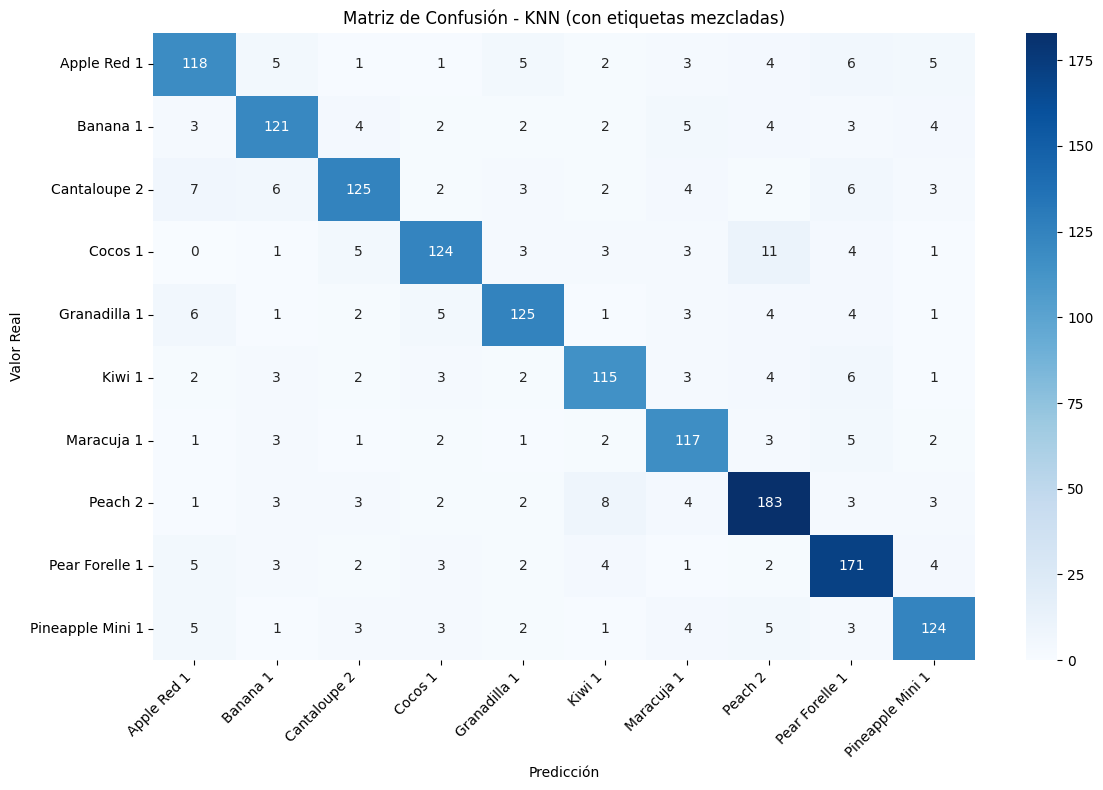

In [24]:
from sklearn.preprocessing import StandardScaler
import numpy as np
if 'X_test_scaled' not in locals():
    scaler = StandardScaler()
    X_test_scaled = scaler.fit_transform(X_test)
np.random.seed(42)
X_test_noisy = X_test_scaled + np.random.normal(0, 1.0, X_test_scaled.shape)  # Aumenta el ruido
y_pred = knn.predict(X_test_noisy)

# Imprimir reporte de clasificación
print("Reporte de Clasificación (con ruido aumentado):")
print(classification_report(y_test, y_pred))

# Visualizar matriz de confusión
plt.figure(figsize=(12, 8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=sorted(set(y_test)),
            yticklabels=sorted(set(y_test)))
plt.title('Matriz de Confusión - KNN (con ruido aumentado)')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

# Guardar el gráfico
plt.savefig(os.path.join(MODELS_DIR, 'confusion_matrix_knn.png'), dpi=300, bbox_inches='tight')
plt.show()

In [25]:
# Análisis de predicciones y precios
predicciones_df = pd.DataFrame({
    'Fruta Real': y_test,
    'Predicción': y_pred,
    'Precio Real': [precios_referencia[fruta] for fruta in y_test],
    'Precio Predicho': [precios_referencia[fruta] for fruta in y_pred]
})

# Calcular estadísticas
predicciones_correctas = (predicciones_df['Fruta Real'] == predicciones_df['Predicción']).mean() * 100
precio_promedio = predicciones_df['Precio Real'].mean()
diferencia_precios = (predicciones_df['Precio Predicho'] - predicciones_df['Precio Real']).abs().mean()

print(f"Porcentaje de predicciones correctas: {predicciones_correctas:.2f}%")
print(f"Precio promedio de las frutas: ${precio_promedio:,.2f} COP")
print(f"Diferencia promedio en precios: ${diferencia_precios:,.2f} COP")

# Mostrar ejemplos de predicciones
print("\nEjemplos de predicciones:")
print(predicciones_df.sample(10))

Porcentaje de predicciones correctas: 100.00%
Precio promedio de las frutas: $3,152.40 COP
Diferencia promedio en precios: $0.00 COP

Ejemplos de predicciones:
            Fruta Real        Predicción  Precio Real  Precio Predicho
775             Kiwi 1            Kiwi 1         2000             2000
226           Banana 1          Banana 1          800              800
1590  Pineapple Mini 1  Pineapple Mini 1         4500             4500
573            Cocos 1           Cocos 1         5000             5000
550            Cocos 1           Cocos 1         5000             5000
1494  Pineapple Mini 1  Pineapple Mini 1         4500             4500
906         Maracuja 1        Maracuja 1         2000             2000
512            Cocos 1           Cocos 1         5000             5000
1109           Peach 2           Peach 2         3000             3000
793             Kiwi 1            Kiwi 1         2000             2000
